In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:130px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [29]:
df['대여량'].max() # 3258.0
df['대여량'].min() # 1.0
df['대여량'].mean() # 180
df['대여량'].median() # 111
df['대여량'].std() # 220

220.64710824480056

In [30]:
num_bins = 9  # 9~10구간 권장
df['대여량_bin'], bins = pd.qcut(df['대여량'], q=num_bins, labels=False, retbins=True, duplicates='drop')
print(bins)

[1.000e+00 1.900e+01 3.700e+01 6.200e+01 9.300e+01 1.310e+02 1.810e+02
 2.540e+02 3.930e+02 3.258e+03]


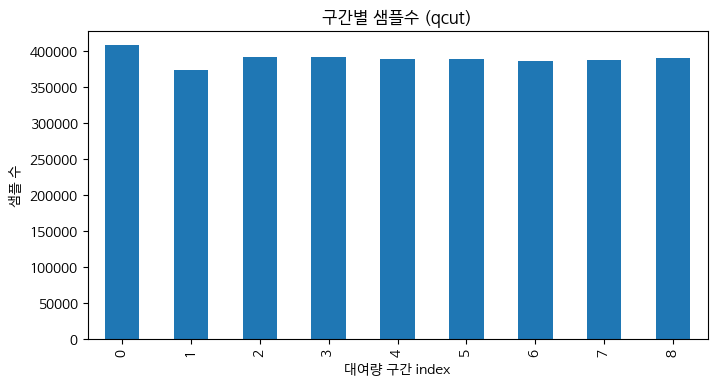

In [32]:
import matplotlib.pyplot as plt
plt.rc('font',family = 'Hancom Gothic')
plt.figure(figsize=(8,4))
df['대여량_bin'].value_counts(sort=False).plot(kind='bar')
plt.title('구간별 샘플수 (qcut)')
plt.xlabel('대여량 구간 index')
plt.ylabel('샘플 수')
plt.show()


대여량 구간 경계값: [1.000e+00 1.900e+01 3.700e+01 6.200e+01 9.300e+01 1.310e+02 1.810e+02
 2.540e+02 3.930e+02 3.258e+03]


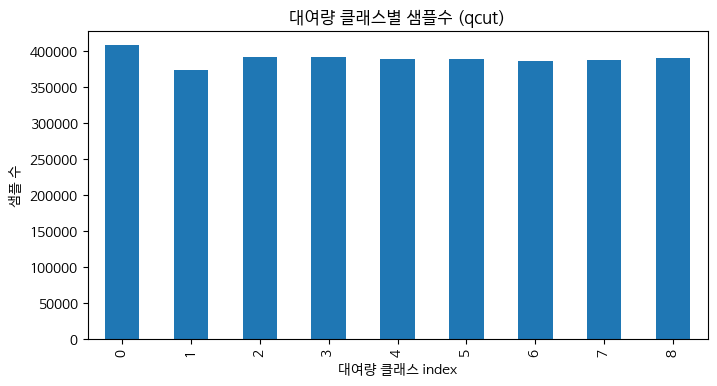

C:\Users\wjdwh\AppData\Local\Temp\ipykernel_36984\450612529.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])


Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.96912, saving model to best_lstm_model.h5
3414/3414 - 13s - loss: 0.2861 - accuracy: 0.8894 - val_loss: 0.0805 - val_accuracy: 0.9691 - 13s/epoch - 4ms/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.96912
3414/3414 - 11s - loss: 0.0952 - accuracy: 0.9615 - val_loss: 0.0845 - val_accuracy: 0.9610 - 11s/epoch - 3ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.96912
3414/3414 - 11s - loss: 0.0815 - accuracy: 0.9667 - val_loss: 0.1305 - val_accuracy: 0.9429 - 11s/epoch - 3ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.96912 to 0.98112, saving model to best_lstm_model.h5
3414/3414 - 12s - loss: 0.0760 - accuracy: 0.9689 - val_loss: 0.0488 - val_accuracy: 0.9811 - 12s/epoch - 3ms/step
Epoch 5/100

Epoch 5: val_accuracy improved from 0.98112 to 0.98293, saving model to best_lstm_model.h5
3414/3414 - 11s - loss: 0.0724 - accuracy: 0.9702 - val_loss: 0.0478 - val_accuracy: 0.9829 - 11s/epoch

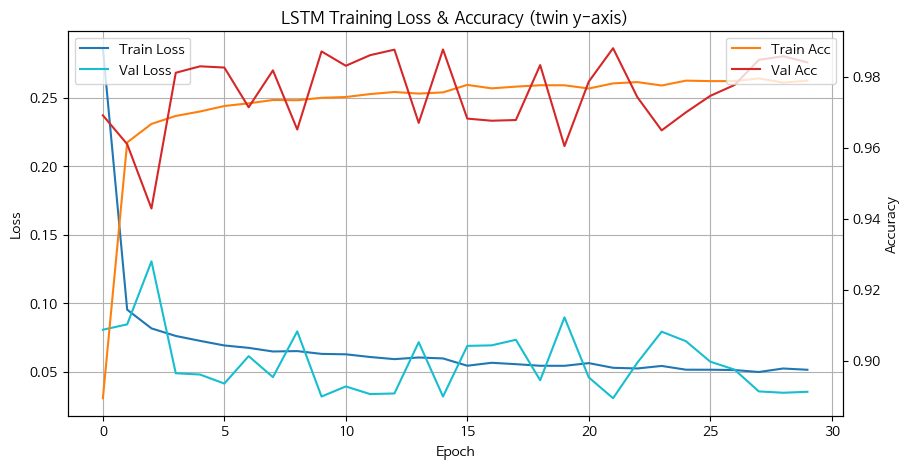

27382/27382 [==============================] - 28s 1ms/step
Validation Accuracy: 0.9879
Validation Classification Report
              precision    recall  f1-score   support

           0      0.992     0.989     0.990     80211
           1      0.988     0.979     0.984     87214
           2      0.987     0.980     0.983     93670
           3      0.981     0.983     0.982     92428
           4      0.982     0.995     0.989     93559
           5      0.996     0.977     0.986     96427
           6      0.978     0.993     0.986     99518
           7      0.991     0.993     0.992    111708
           8      0.994     0.997     0.996    121471

    accuracy                          0.988    876206
   macro avg      0.988     0.987     0.988    876206
weighted avg      0.988     0.988     0.988    876206



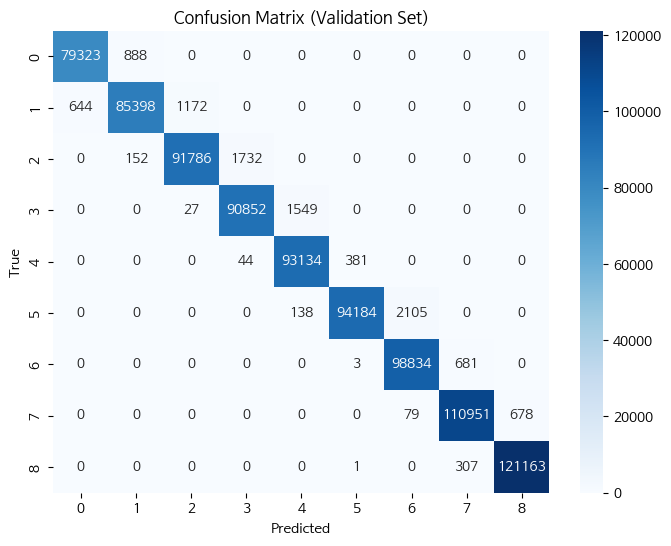

27461/27461 [==============================] - 28s 1ms/step
Test Accuracy: 0.9872
Test Classification Report
              precision    recall  f1-score   support

           0      0.988     0.988     0.988     68456
           1      0.989     0.978     0.983     89909
           2      0.987     0.977     0.982    100977
           3      0.978     0.983     0.981    101091
           4      0.981     0.995     0.988    101027
           5      0.996     0.976     0.986     98711
           6      0.978     0.994     0.986    100092
           7      0.992     0.993     0.993    102850
           8      0.995     0.998     0.996    115622

    accuracy                          0.987    878735
   macro avg      0.987     0.987     0.987    878735
weighted avg      0.987     0.987     0.987    878735



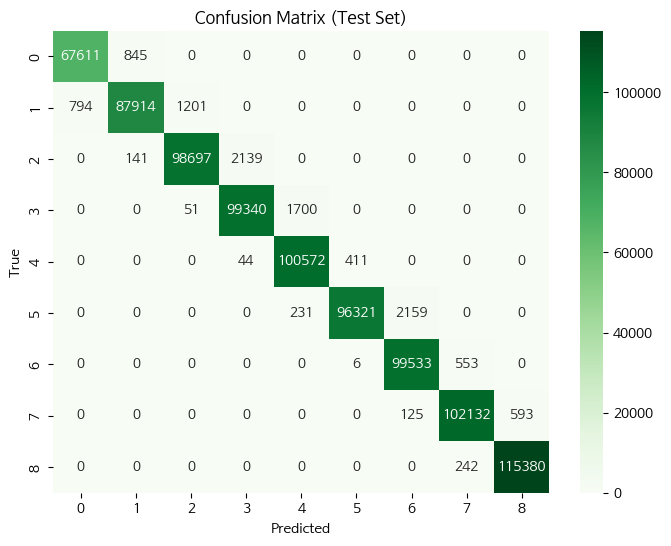

In [33]:
import pandas as pd
import numpy as np
import joblib
from datetime import datetime, timedelta
import holidays
import tensorflow as tf

# 데이터 로딩 및 전처리
df = pd.read_csv('LSTM최종데이터_X_Y_라벨링등전.csv')
df = df.dropna(subset=['대여량'])

df['일시'] = pd.to_datetime(df['일시'])
df['연'] = df['일시'].dt.year
df['월'] = df['일시'].dt.month
df['일'] = df['일시'].dt.day
df['시'] = df['일시'].dt.hour
df['요일'] = df['일시'].dt.dayofweek
start_year = df['연'].min()
end_year = df['연'].max()
kr_holidays = holidays.KR(years=range(start_year, end_year+1))
df['공휴일'] = df['일시'].dt.floor('D').isin(kr_holidays).astype(int)

df['key'] = df['행정구'] + '_' + df['월'].astype(str) + '_' + df['일'].astype(str) + '_' + df['시'].astype(str)
df['일시_1년전'] = df['일시'] - pd.DateOffset(years=1)
df['key_1년전'] = df['행정구'] + '_' + df['일시_1년전'].dt.month.astype(str) + '_' + df['일시_1년전'].dt.day.astype(str) + '_' + df['일시_1년전'].dt.hour.astype(str)
cols_to_copy = ['key', '대여량', '총생활인구수']
df_1y = df[cols_to_copy].copy()
df_1y.columns = [c + '_1년전' if c != 'key' else 'key_1년전' for c in cols_to_copy]
df = pd.merge(df, df_1y, how='left', on='key_1년전')
df = df.dropna(subset=['대여량_1년전', '총생활인구수_1년전'])

# 범주형 구간 자동(9개) 생성 (qcut 사용) => 데이터 쏠림이 없도록 구간을 자동 생성
num_bins = 9
df['대여량_class'], bins = pd.qcut(df['대여량'], q=num_bins, labels=False, retbins=True, duplicates='drop')
print("대여량 구간 경계값:", bins)

# 구간별 데이터 분포 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
df['대여량_class'].value_counts(sort=False).plot(kind='bar')
plt.title('대여량 클래스별 샘플수 (qcut)')
plt.xlabel('대여량 클래스 index')
plt.ylabel('샘플 수')
plt.show()

# 나머지 파생 변수 생성 및 인코딩
df['인구_증감'] = df['총생활인구수'] - df['총생활인구수_1년전']
df['인구_증감률'] = (df['총생활인구수'] - df['총생활인구수_1년전']) / (df['총생활인구수_1년전'] + 1)
df['대여량_증감'] = df['대여량'] - df['대여량_1년전']
df['대여량_증감률'] = (df['대여량'] - df['대여량_1년전']) / (df['대여량_1년전'] + 1)

from sklearn.preprocessing import LabelEncoder, StandardScaler
label_cols = ['행정구']
le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

feature_cols = [
    '행정구', '월', '일', '시', '요일', '총생활인구수', '강수', '기온', '습도', '풍속',
    '주말구분', '공휴일',
    '대여량_1년전', '총생활인구수_1년전',
    '대여량_증감', '대여량_증감률', '인구_증감', '인구_증감률'
]
X = df[feature_cols]
y = df['대여량_class']

num_cols = [
    '총생활인구수', '강수', '기온', '습도', '풍속',
    '대여량_1년전', '총생활인구수_1년전',
    '대여량_증감', '대여량_증감률', '인구_증감', '인구_증감률'
]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

train_idx = df['연'] <= 2022
val_idx = (df['연'] == 2023)
test_idx = (df['연'] == 2024)
X_train, X_val, X_test = X[train_idx], X[val_idx], X[test_idx]
y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_val_lstm = np.expand_dims(X_val.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

num_classes = y.nunique()
model_lstm = Sequential([
    LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)
mc = ModelCheckpoint('best_lstm_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
history = model_lstm.fit(
    X_train_lstm, y_train,
    epochs=100,
    batch_size=512,
    validation_data=(X_val_lstm, y_val),
    callbacks=[es, mc],
    verbose=2
)

# 학습과정 그래프를 subplots와 twinx로 시각화
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(history.history['loss'], label='Train Loss', color='tab:blue')
ax1.plot(history.history['val_loss'], label='Val Loss', color='tab:cyan')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], label='Train Acc', color='tab:orange')
ax2.plot(history.history['val_accuracy'], label='Val Acc', color='tab:red')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')
plt.title('LSTM Training Loss & Accuracy (twin y-axis)')
plt.show()

# --------- 평가(검증/테스트) 및 시각화 ---------
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_val = np.argmax(model_lstm.predict(X_val_lstm), axis=1)
val_acc = (y_pred_val == y_val.values).mean()
print(f"Validation Accuracy: {val_acc:.4f}")
print("Validation Classification Report")
print(classification_report(y_val, y_pred_val, digits=3))
plt.figure(figsize=(8,6))
cm_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

y_pred_test = np.argmax(model_lstm.predict(X_test_lstm), axis=1)
test_acc = (y_pred_test == y_test.values).mean()
print(f"Test Accuracy: {test_acc:.4f}")
print("Test Classification Report")
print(classification_report(y_test, y_pred_test, digits=3))
plt.figure(figsize=(8,6))
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 모델, 스케일러, 인코더, feature 리스트 저장
model_lstm.save('best_lstm_model.h5')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_dict, 'labelencoders.pkl')
joblib.dump(feature_cols, 'featurecols.pkl')
joblib.dump(num_cols, 'numcols.pkl')

# 클래스 index → 대여량 구간 변환 함수
def class_to_range(pred_class):
    # qcut 구간을 이용해서 문자로 반환
    global bins
    pred_class = int(pred_class)
    left = int(bins[pred_class])
    right = int(bins[pred_class+1]) if pred_class+1 < len(bins) else '+'
    return f"{left} ~ {right}"

# 예측 함수 (동일)
def predict_bike_demand(행정구, 강수, 습도, 풍속, 기온):
    """
    행정구명, 강수, 습도, 풍속, 기온을 입력받아
    해당 시간의 공공자전거 대여량 예측 클래스를 반환하는 함수
    """
    import pandas as pd
    import numpy as np
    import joblib
    from datetime import datetime, timedelta
    import holidays
    import tensorflow as tf

    le_dict = joblib.load('labelencoders.pkl')
    scaler = joblib.load('scaler.pkl')
    feature_cols = joblib.load('featurecols.pkl')
    num_cols = joblib.load('numcols.pkl')
    model = tf.keras.models.load_model('best_lstm_model.h5')

    now = datetime.now()
    년, 월, 일, 시 = now.year, now.month, now.day, now.hour
    요일 = now.weekday()
    주말구분 = 1 if 요일 >= 5 else 0
    kr_holidays = holidays.KR(years=[년])
    공휴일 = int(now.date() in kr_holidays)

    dt_1y = now - timedelta(days=365)
    년_1, 월_1, 일_1, 시_1 = dt_1y.year, dt_1y.month, dt_1y.day, dt_1y.hour
    row_1y = df[(df['행정구'] == le_dict['행정구'].transform([행정구])[0]) &
                (df['연'] == 년_1) & (df['월'] == 월_1) &
                (df['일'] == 일_1) & (df['시'] == 시_1)]
    if row_1y.empty:
        raise ValueError('1년 전 데이터가 존재하지 않습니다.')
    대여량_1년전 = row_1y['대여량'].values[0]
    총생활인구수_1년전 = row_1y['총생활인구수'].values[0]
    총생활인구수 = 총생활인구수_1년전

    대여량_증감 = 0
    대여량_증감률 = 0
    인구_증감 = 0
    인구_증감률 = 0

    input_dict = {
        '행정구': le_dict['행정구'].transform([행정구])[0],
        '월': 월,
        '일': 일,
        '시': 시,
        '요일': 요일,
        '총생활인구수': 총생활인구수,
        '강수': 강수,
        '기온': 기온,
        '습도': 습도,
        '풍속': 풍속,
        '주말구분': 주말구분,
        '공휴일': 공휴일,
        '대여량_1년전': 대여량_1년전,
        '총생활인구수_1년전': 총생활인구수_1년전,
        '대여량_증감': 대여량_증감,
        '대여량_증감률': 대여량_증감률,
        '인구_증감': 인구_증감,
        '인구_증감률': 인구_증감률
    }
    input_df = pd.DataFrame([input_dict])
    input_df[num_cols] = scaler.transform(input_df[num_cols])
    X_input = input_df[feature_cols].values
    X_input = np.expand_dims(X_input, axis=1)
    pred = model.predict(X_input)
    pred_class = int(np.argmax(pred, axis=1)[0])
    return pred_class

# 사용 예시
# pred = predict_bike_demand('강남구', 0.2, 60, 2.5, 21)
# print(pred, class_to_range(pred))


In [36]:
def class_to_range(pred_class):
    # qcut 구간을 이용해서 문자로 반환
    global bins
    pred_class = int(pred_class)
    left = int(bins[pred_class])
    right = int(bins[pred_class+1]) if pred_class+1 < len(bins) else '+'
    return f"{left} ~ {right}"

# 예측 함수 (동일)
def predict_bike_demand(행정구, 강수, 습도, 풍속, 기온):
    """
    행정구명, 강수, 습도, 풍속, 기온을 입력받아
    해당 시간의 공공자전거 대여량 예측 클래스를 반환하는 함수
    """
    import pandas as pd
    import numpy as np
    import joblib
    from datetime import datetime, timedelta
    import holidays
    import tensorflow as tf

    le_dict = joblib.load('labelencoders.pkl')
    scaler = joblib.load('scaler.pkl')
    feature_cols = joblib.load('featurecols.pkl')
    num_cols = joblib.load('numcols.pkl')
    model = tf.keras.models.load_model('best_lstm_model.h5')

    now = datetime.now()
    년, 월, 일, 시 = now.year, now.month, now.day, now.hour
    요일 = now.weekday()
    주말구분 = 1 if 요일 >= 5 else 0
    kr_holidays = holidays.KR(years=[년])
    공휴일 = int(now.date() in kr_holidays)

    dt_1y = now - timedelta(days=365)
    년_1, 월_1, 일_1, 시_1 = dt_1y.year, dt_1y.month, dt_1y.day, dt_1y.hour
    row_1y = df[(df['행정구'] == le_dict['행정구'].transform([행정구])[0]) &
                (df['연'] == 년_1) & (df['월'] == 월_1) &
                (df['일'] == 일_1) & (df['시'] == 시_1)]
    if row_1y.empty:
        raise ValueError('1년 전 데이터가 존재하지 않습니다.')
    대여량_1년전 = row_1y['대여량'].values[0]
    총생활인구수_1년전 = row_1y['총생활인구수'].values[0]
    총생활인구수 = 총생활인구수_1년전

    대여량_증감 = 0
    대여량_증감률 = 0
    인구_증감 = 0
    인구_증감률 = 0

    input_dict = {
        '행정구': le_dict['행정구'].transform([행정구])[0],
        '월': 월,
        '일': 일,
        '시': 시,
        '요일': 요일,
        '총생활인구수': 총생활인구수,
        '강수': 강수,
        '기온': 기온,
        '습도': 습도,
        '풍속': 풍속,
        '주말구분': 주말구분,
        '공휴일': 공휴일,
        '대여량_1년전': 대여량_1년전,
        '총생활인구수_1년전': 총생활인구수_1년전,
        '대여량_증감': 대여량_증감,
        '대여량_증감률': 대여량_증감률,
        '인구_증감': 인구_증감,
        '인구_증감률': 인구_증감률
    }
    input_df = pd.DataFrame([input_dict])
    input_df[num_cols] = scaler.transform(input_df[num_cols])
    X_input = input_df[feature_cols].values
    X_input = np.expand_dims(X_input, axis=1)
    pred = model.predict(X_input)
    pred_class = int(np.argmax(pred, axis=1)[0])
    return pred_class

# 사용 예시
pred = predict_bike_demand('강남구', 0.2, 60, 2.5, 21)
print(pred, class_to_range(pred))

1/1 [==============================] - 0s 187ms/step
4 93 ~ 131
